In [1]:
import pathlib

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import notebook
import os

import pandas as pd

C:\Users\alex9\AppData\Roaming\Python\Python38\site-packages\ipykernel\parentpoller.py:110: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [2]:
%load_ext autoreload
%autoreload 2

from dataset import DetectionDataset
from dataset.plates_module import filter_marks
from utils import draw_bbox, load_json

In [3]:
data_dir = pathlib.Path("data", "raw", "made-cv-2021-contest-02-license-plate-recognition", "data")

In [4]:
marks = load_json(os.path.join(data_dir, "train.json"))

In [5]:
dataset = DetectionDataset(marks, str(data_dir), 900)

In [6]:
len(marks)

25633

In [7]:
len(filter_marks(marks))

Remove incorrcet boxes:  1
Remove incorrcet boxes:  1
Remove incorrcet boxes:  1
Remove incorrcet boxes:  1
Remove incorrcet boxes:  1
Images with incorrect aspect ratio:  5


25628

train/25511.jpg
tensor([599, 431, 664, 456], dtype=torch.int32)
tensor([749, 382, 800, 402], dtype=torch.int32)


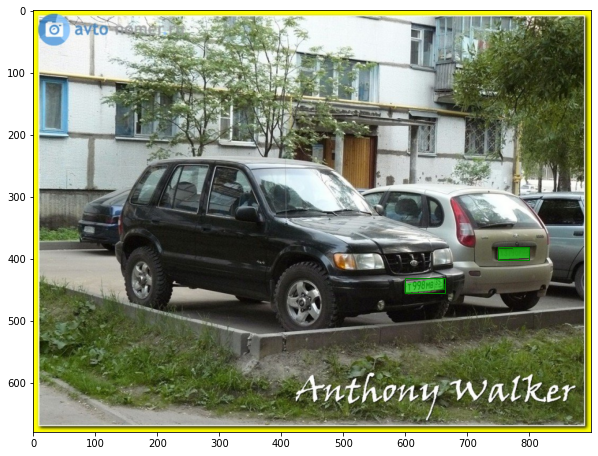

In [8]:
index = 25511
img, info = dataset[index]
print(marks[index]["file"])
fig = draw_bbox(img, info["boxes"])
for mask in info["masks"]:
    ax = fig.axes[0]
    mask = np.dstack((mask, mask, mask, mask))
    mask[..., 1] *= 255
    mask[..., -1] *= 255
    mask[..., [0, 2]] = 0
    ax.imshow(mask, alpha=0.5)

In [9]:
bbox_areas = []

for i, item in notebook.tqdm(enumerate(marks), total=len(marks)):
    boxes = item["nums"]
    try:
        with Image.open(data_dir / item["file"]) as img:
            width = img.width
            height=  img.height
        
        for box in boxes:
            points = np.round(np.array(box['box'])).astype(np.int32)
            x0, y0 = np.min(points[:, 0]), np.min(points[:, 1])
            x2, y2 = np.max(points[:, 0]), np.max(points[:, 1])
            bbox_width = x2 - x0
            bbox_height = y2 - y0
            bbox_areas.append({"file": item["file"], "data_index": i, "area_ratio": bbox_height * bbox_width / (height * width), "aspect_ratio": bbox_width / bbox_height})
    except:
        print("Skip" , item["file"])

  0%|          | 0/25633 [00:00<?, ?it/s]

Skip train/25632.bmp


In [10]:
bbox_info = pd.DataFrame.from_records(bbox_areas)

In [11]:
bbox_info.head()

,file,data_index,area_ratio,aspect_ratio
0,train/0.jpg,0,0.028854,2.502994
1,train/1.jpg,1,0.019535,2.171717
2,train/1.jpg,1,0.000778,3.312500
3,train/2.jpg,2,0.001396,3.388889
4,train/3.jpg,3,0.015608,3.031915


<AxesSubplot:>

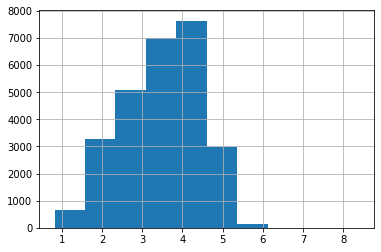

In [12]:
bbox_info["aspect_ratio"].hist()

In [13]:
bbox_info[bbox_info["aspect_ratio"] <= 0.8]

,file,data_index,area_ratio,aspect_ratio


<AxesSubplot:>

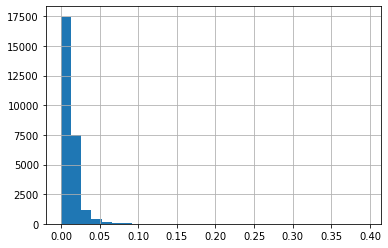

In [14]:
bbox_info["area_ratio"].hist(bins=30)

In [15]:
bbox_info[bbox_info["area_ratio"] < 0.0025]

,file,data_index,area_ratio,aspect_ratio
2,train/1.jpg,1,0.000778,3.312500
3,train/2.jpg,2,0.001396,3.388889
51,train/50.bmp,50,0.001991,2.232558
63,train/59.jpg,59,0.001065,4.190476
80,train/75.jpg,75,0.001953,3.965517
...,...,...,...,...
26655,train/25490.jpg,25490,0.001208,3.588235
26671,train/25505.jpg,25505,0.002358,4.171429
26673,train/25507.jpg,25507,0.001867,3.500000
26678,train/25511.jpg,25511,0.001659,2.608696
